In [1]:
import torch
x=torch.Tensor([5,3])
y=torch.Tensor([2,3])
print(x*y)

tensor([10.,  9.])


In [3]:
x=torch.zeros([2,5])

In [4]:
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [5]:
y=torch.rand([2,5])

In [6]:
y

tensor([[0.0391, 0.6016, 0.0844, 0.8085, 0.6413],
        [0.6364, 0.6110, 0.7151, 0.4314, 0.6533]])

In [ ]:
#no reshape will used view

In [7]:
y.view([1,10])

tensor([[0.0391, 0.6016, 0.0844, 0.8085, 0.6413, 0.6364, 0.6110, 0.7151, 0.4314,
         0.6533]])

In [9]:
y=y.view([1,10])

In [10]:
y

tensor([[0.0391, 0.6016, 0.0844, 0.8085, 0.6413, 0.6364, 0.6110, 0.7151, 0.4314,
         0.6533]])

In [11]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train=datasets.MNIST("", train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))

test=datasets.MNIST("", train=False, download=True,transform=transforms.Compose([transforms.ToTensor()]))

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=10)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=10)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

In [6]:
x,y= data[0][0],data[1][0]
print(y)

tensor(2)


In [7]:
import matplotlib.pyplot as plt


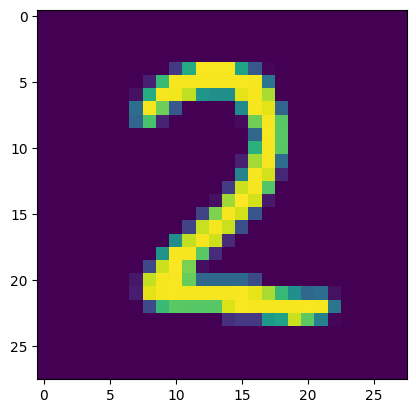

In [11]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [9]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [14]:
total=0
counter_dict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs,ys=data
    for y in ys:
        counter_dict[int(y)]+=1
        total+=1
print (counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
#porcentaje de la distribucion para ver el balance de las clases

for i in counter_dict:
    print(f"{i}:{counter_dict[i]/total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [18]:
#build the model
import torch.nn as nn
import torch.nn.functional as F


In [22]:
#contruyendo la clase para la RNA
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28, 64)#tipo de funcion
        self.fc2=nn.Linear(64, 64)#la entrada es 64 por la capa anterior
        self.fc3=nn.Linear(64, 64)
        self.fc4=nn.Linear(64, 10)#la salida es 10 por el numero de clases que tenemos
        
    def forward(self,x):
        x=F.relu(self.fc1(x))#Rectifier 
        x=F.relu(self.fc2(x)) #ReLU (rectified linear unit)
        x=F.relu(self.fc3(x))
        x=self.fc4(x)      
        return F.log_softmax(x,dim=1)


        


    
    
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [29]:
X= torch.rand((28,28))
X=X.view(-1,28*28)

In [30]:
output=net(X)

In [31]:
output

tensor([[-2.3346, -2.2519, -2.2300, -2.3874, -2.3785, -2.2235, -2.4166, -2.2605,
         -2.3319, -2.2348]], grad_fn=<LogSoftmaxBackward0>)

In [42]:
#AHORA TRABAJAREMOS CON LOS DATOS

import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001) #lr learning rate step
EPOCHS=3

for epoch in range(EPOCHS):
    for data in trainset:
        X,y=data
        net.zero_grad() #
        output=net(X.view(-1,28*28))
        loss= F.nll_loss(output,y) #The negative log likelihood loss
        #backpropagation the error
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.0170, grad_fn=<NllLossBackward0>)
tensor(0.0287, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)


In [44]:
correct=0
total=0

with torch.no_grad():
    for data in trainset:
        X,y=data
        output=net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy: ", round(correct/total,3))



Accuracy:  0.984


In [45]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

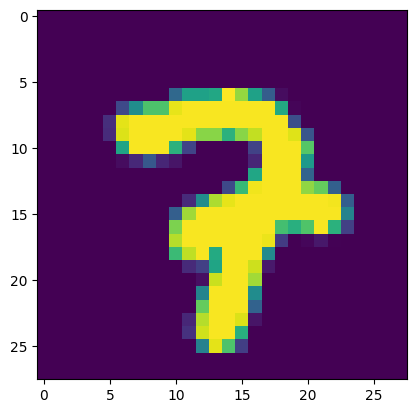

In [57]:
import matplotlib.pyplot as plt
plt.imshow(X[8].view(28,28))
plt.show()

In [59]:
print(torch.argmax(net(X[8].view(-1,28*28))[0]))

#EL indice de X indica la muestra y respuesta
#el numero de tensor es la respuesta de la clasificación

tensor(7)


In [14]:
#ahora con redes neuronales convolucionales
#https://www.microsoft.com/en-us/download/details.aspx?id=54765

import os
import cv2
import numpy as np
from tqdm import tqdm
REBUILD_DATA=False

In [2]:
pip install cv2


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Note: you may need to restart the kernel to use updated packages.


In [46]:


class DogsVSCats():
    IMG_SIZE=50
    CATS="/media/anabcm/Nuevo vol/descargas/kagglecatsanddogs_5340/PetImages/Cat/"
    DOGS="/media/anabcm/Nuevo vol/descargas/kagglecatsanddogs_5340/PetImages/Dog/"
    LABELS={CATS:0, DOGS:1}
    training_data=[]
    catcount=0
    dogcount=0
#reescalando las imagenes, transformando y quitando color
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try: #en caso de que la imagen este en malas condiciones
                    path=os.path.join(label,f)
                   
                    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img=cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])
                    if label==self.CATS:
                        self.catcount+=1
                    elif label==self.DOGS:
                        self.dogcount+=1
                except Exception as e:
                    pass
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)
        print(type(self.training_data))
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        



In [47]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS="/media/anabcm/Nuevo vol/descargas/kagglecatsanddogs_5340/PetImages/Cat/"
    DOGS="/media/anabcm/Nuevo vol/descargas/kagglecatsanddogs_5340/PetImages/Dog/"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        print(len(self.training_data))
        print(len(self.training_data[0]))
        self.training_data= np.array(self.training_data, dtype=object)
        np.save("training_data.npy", self.training_data)
        print('Cats:',self.catcount)
        print('Dogs:',self.dogcount)

In [48]:
if REBUILD_DATA:
    dogsvscats=DogsVSCats()
    dogsvscats.make_training_data()

/media/anabcm/Nuevo vol/descargas/kagglecatsanddogs_5340/PetImages/Cat/


100%|███████████████████████████████████| 12501/12501 [00:07<00:00, 1590.51it/s]


/media/anabcm/Nuevo vol/descargas/kagglecatsanddogs_5340/PetImages/Dog/


100%|███████████████████████████████████| 12501/12501 [00:07<00:00, 1741.94it/s]


24946
2
Cats: 12476
Dogs: 12470


In [49]:
pip install opencv-python
#for install cv2

SyntaxError: invalid syntax (4116988557.py, line 1)

In [51]:
training_data=np.load("training_data.npy",allow_pickle=True)

In [52]:
print(len(training_data))


24946


In [53]:
print(training_data[0])

[array([[137, 141, 207, ...,  66, 189, 198],
        [113, 120, 107, ..., 166,  84, 148],
        [163, 182, 123, ..., 178, 115, 107],
        ...,
        [ 69,  34,  28, ..., 101,  96,  92],
        [199, 197, 204, ..., 103,  94,  80],
        [210, 204, 219, ..., 104,  95,  92]], dtype=uint8) array([0., 1.])]


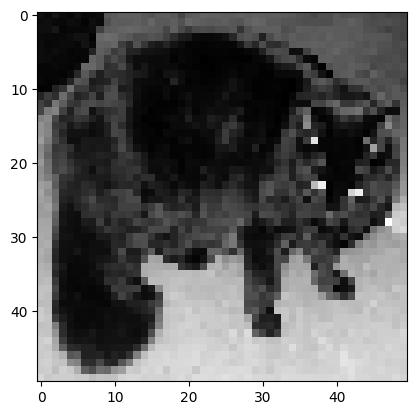

In [56]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0],cmap="gray")
plt.show()

In [57]:
training_data[1][1]

array([1., 0.])

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,32,5)
        self.conv2=nn.Conv2d(32,64,5)
        self.conv3=nn.Conv2d(64,128,5)
        x= torch.randn(50,50).view(-1,1,50,50)
        self._to_linear=None
        self.convs(x)

       # self.fc1=nn.Linear(-1,512)
       # self.fc2=nn.Linear(512,2)
    
        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).
        
    def convs(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        #print(x[0].shape)
        if self._to_linear is None:
            self._to_linear=x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
        
    def forward(self,x):
        x=self.convs(x)
        x=x.view(-1,self._to_linear)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return F.softmax(x,dim=1)


training_data=np.load("training_data.npy",allow_pickle=True)        
net=Net()

In [19]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)
loss_function=nn.MSELoss()
X=torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X=X/255.0
y=torch.Tensor([i[1] for i in training_data])
VAL_PCT=0.1
val_size=int(len(X)*VAL_PCT)
print(val_size)

2494


In [20]:
train_X=X[:-val_size]
train_y=y[:-val_size]

test_x=X[-val_size:]
test_y=y[-val_size:]

print(len(train_X))
print(len(test_x))

22452
2494


In [21]:
#for the training set
BATCH_SIZE=100
EPOCHS=1
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X),BATCH_SIZE)):
        #print(i,i+BATCH_SIZE)
        batch_X=train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
        batch_y=train_y[i:i+BATCH_SIZE]
        net.zero_grad()
        outputs=net(batch_X)
        loss=loss_function(outputs,batch_y)
        loss.backward()
        optimizer.step()
print(loss)

100%|█████████████████████████████████████████| 225/225 [00:59<00:00,  3.78it/s]

tensor(0.2065, grad_fn=<MseLossBackward0>)


In [22]:
#testing
correct=0
total=0
with torch.no_grad():
    for i in tqdm(range(len(test_x))):
        real_class=torch.argmax(test_y[i])
        net_output=net(test_x[i].view(-1,1,50,50))[0]
        predicted_class=torch.argmax(net_output)
        if predicted_class==real_class:
            correct+=1
        total+=1
print("ACCURACY: ",round(correct/total,3))

100%|██████████████████████████████████████| 2494/2494 [00:05<00:00, 428.97it/s]

ACCURACY:  0.654
